<a href="https://colab.research.google.com/github/Fundkdh/algorithm-2022/blob/main/python_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd


In [182]:
import pandas as pd
df2 = pd.read_csv("/content/drive/MyDrive/Ashopping2.csv", encoding = '"cp949')
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [183]:
import math
from sklearn import preprocessing #데이터 전처리
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화
from sklearn.preprocessing import StandardScaler #데이터 표준화
from scipy.stats import boxcox 
df2["총_매출액_scale"] = preprocessing.scale(df2["총_매출액"])

In [184]:
df2["총_매출액_scale"].describe() #총 매출액 정리


count   1000.000
mean       0.000
std        1.001
min       -0.689
25%       -0.541
50%       -0.338
75%        0.119
max       10.054
Name: 총_매출액_scale, dtype: float64

In [185]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df2)
df_minmax
df_minmax = pd.DataFrame(df_minmax)
df2["총_매출액_minmax"] = df_minmax[2]

In [186]:
df2["총_매출액_minmax"] #총 매출액의  정규값

0     0.023
1     0.012
2     0.005
3     0.049
4     0.153
       ... 
995   0.038
996   0.108
997   0.006
998   0.120
999   0.012
Name: 총_매출액_minmax, Length: 1000, dtype: float64

In [187]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [188]:
x_scale = df2[["방문빈도", "할인권_사용 횟수"]] #x_scale 정의
x_noscale = df2[["이탈여부", "거주지역"]]  #x_noscale 정의
scaler = MinMaxScaler() # 스케일러 정의
x_scale_minmax = scaler.fit_transform(x_scale) # x_scale을 fit(), transform()
x_scale_minmax = pd.DataFrame(x_scale_minmax)
x_scale_minmax
x_scale_minmax2 = scaler.fit_transform(x_noscale) #x_noscale 값을 fit(), transform()
x_scale_minmax2 = pd.DataFrame(x_scale_minmax2)
x_scale_minmax2

,0,1
0,0.000,0.833
1,1.000,0.500
2,0.000,0.833
3,0.000,0.667
4,0.000,0.833
...,...,...
995,0.000,0.833
996,0.000,0.833
997,0.000,0.500
998,0.000,0.667


In [189]:
x = pd.concat([x_scale_minmax, x_noscale], axis = 1) #열 기준으로 x_scale_minmax 값과 x_noscale 값을 합친다.
x

,0,1,이탈여부,거주지역
0,0.075,0.000,0,6
1,0.060,0.724,1,4
2,0.080,0.172,0,6
3,0.075,0.000,0,5
4,0.353,0.276,0,6
...,...,...,...,...
995,0.030,0.069,0,6
996,0.234,0.172,0,6
997,0.040,0.241,0,4
998,0.065,0.655,0,5


In [190]:
x_scale_minmax.columns = ["방문빈도", "할인권_사용 횟수"] # 인덱스값 출력력
x_scale_minmax.columns

Index(['방문빈도', '할인권_사용 횟수'], dtype='object')

In [191]:
x_minmax = pd.DataFrame (x_scale_minmax)
x_minmax

,방문빈도,할인권_사용 횟수
0,0.075,0.000
1,0.060,0.724
2,0.080,0.172
3,0.075,0.000
4,0.353,0.276
...,...,...
995,0.030,0.069
996,0.234,0.172
997,0.040,0.241
998,0.065,0.655


In [192]:
x_minmax

,방문빈도,할인권_사용 횟수
0,0.075,0.000
1,0.060,0.724
2,0.080,0.172
3,0.075,0.000
4,0.353,0.276
...,...,...
995,0.030,0.069
996,0.234,0.172
997,0.040,0.241
998,0.065,0.655


In [193]:
df2.columns #df2값 정리리

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

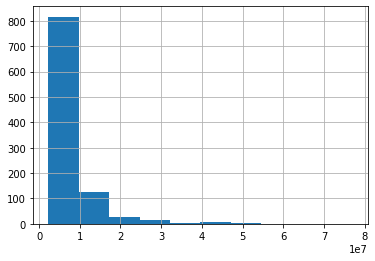

In [194]:
df2.총_매출액.hist() #총_매출액 그래프프

In [195]:
from scipy import stats

In [196]:
#일표본 t-test
print(df2.총_매출액.mean())

print(stats.ttest_1samp(df2["총_매출액"], 7068689))# 한 집단 평균 검정
# 상관 관계가 있다.

7068689.76
Ttest_1sampResult(statistic=3.449911869706077e-06, pvalue=0.9999972480573434)


In [197]:
#독립표본 t-test 

no_claim = df2[df2["클레임접수여부"]==0]
no_claim
claim = df2[df2["클레임접수여부"] ==1]
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630,0.005
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161,0.049
7,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,0.811,0.140
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,6,6,4,5,7,6,6,-0.427,0.024
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,6,7,4,5,5,5,5,-0.476,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,5,6,5,5,6,6,6,6,-0.246,0.041
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,6,4,5,6,6,6,0.116,0.075
989,990,0,2540870,15,169391,23,379950,2,4,1,...,5,6,5,6,6,5,5,5,-0.650,0.004
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,0.321,0.094


In [198]:
no_claim.방문빈도.mean() #방문기록에 대한 평균균

28.184842883548985

In [199]:
claim.방문빈도.mean() #claim 값 평균균

24.736383442265794

In [200]:
print(stats.ttest_ind(no_claim['방문빈도'], claim['방문빈도'], equal_var = False)) #두 독립표본에 대한 t 점정

Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)


In [201]:
!pip install pingouin #분산분석을 위한 패키지지
!pip install scikit_posthocs #사후태스트를 위한 패키지지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [203]:
df2["구매유형"].describe()# 구매유형에 대해서 describe

count   1000.000
mean       3.093
std        0.989
min        1.000
25%        2.000
50%        3.000
75%        4.000
max        4.000
Name: 구매유형, dtype: float64

In [204]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [205]:
df1 = df2 [["구매유형", "총_매출액"]]
pd.options.display.float_format = '{:.3f}'.format# display 옵션 설정 값들이 소숫점 아래 3개로 표현되기로 
type1 = [ ]
for i in range(1, 5, 1):
  type1.append(df1[df1.구매유형 == i].총_매출액)
sp.stats.levene(type1[0], type1[1], type1[2], type1[3]) #등분산 분석을 활용한다. levene -test 결과 등분산이 깨졌다.

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [206]:
pg.welch_anova(dv = "총_매출액", between ="구매유형", data = df2) #등분산이 아닌 경우
#귀무가설 : 각 구매유형 별로 총매출액 평균이 같다.
#대립가설 : 각 구매유형 별로 총 매출액 평균이 다르다.


,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


In [207]:
pg.anova(dv = '총_매출액', between = "구매유형", data = df2 , detailed = True)#등분산 가정 집단 별로 확인하는 것은 윗부분

,Source,SS,DF,MS,F,p-unc,np2
0,구매유형,9376756399592748.000,3,3125585466530916.000,79.609,0.000,0.193
1,Within,39104813092474192.000,996,39261860534612.641,NaN,NaN,NaN


상관관계 분석석

In [208]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

In [209]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [210]:
df1 = df2[['총_매출액', '1회_평균매출액', '총_할인_금액', '방문빈도']]
df1.corr(method = "pearson") #추출한 각 항목에 대해서 피어슨 상관분석 적용용

,총_매출액,1회_평균매출액,총_할인_금액,방문빈도
총_매출액,1.000,0.314,-0.005,0.631
1회_평균매출액,0.314,1.000,-0.018,-0.280
총_할인_금액,-0.005,-0.018,1.000,0.045
방문빈도,0.631,-0.280,0.045,1.000


In [211]:
!sudo apt-get install -y fonts-nanum #한글 적용용
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49832 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

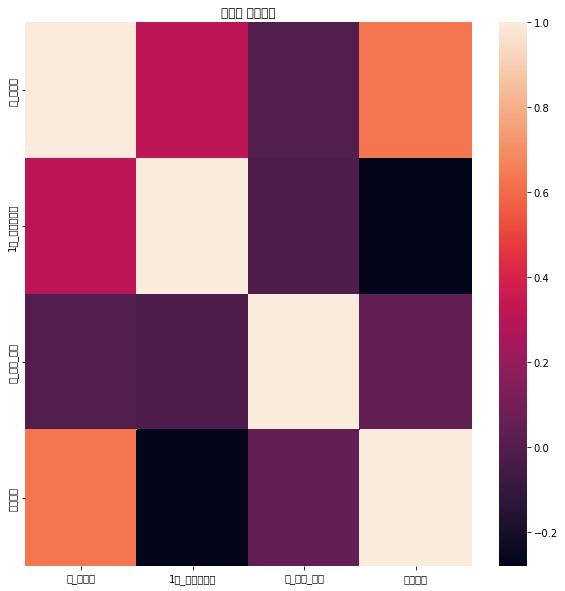

In [212]:
matplotlib.rcParams['font.family'] = "NaNumGothic" #font 값 NaNumGOthic
colormap = plt.cm.PuBu #
plt.figure(figsize =(10,10)) #크기 설정
plt.title("피어슨 상관계수") #제목목
sns.heatmap(df1.astype(float).corr()) #보고서에 유용 적극사용 권장 히트맵


#주성분 분석

In [213]:
from sklearn.decomposition import PCA
df = df2

In [214]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,-0.440,0.023
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,-0.560,0.012
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630,0.005
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161,0.049
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,0.959,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,7,6,6,6,6,6,-0.278,0.038
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,0.466,0.108
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,-0.621,0.006
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,5,5,4,4,0.603,0.120


In [215]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
총_매출액_scale           0
총_매출액_minmax          0
dtype: int64

In [216]:
df = df.dropna(axis = 0)
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
총_매출액_scale         0
총_매출액_minmax        0
dtype: int64

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [219]:
feature ={'고객ID', '이탈여부',  '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'}

In [220]:
df = df.drop(["총_매출액_scale"],axis = 1) #df drop 
df = df.drop(["총_매출액_minmax"],axis = 1)
y = df["총_매출액"].values
x = df.drop(["총_매출액"], axis = 1).values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=feature)
x



,이탈여부,매장_만족도,고객ID,할인권_사용 횟수,거주지역,할인민감여부,상품_품질,멤버쉽_프로그램_가입전_만족도,구매_카테고리_수,Monetary,...,안내_표지판_설명,상품_진열_위치,1회_평균매출액,상품_다양성,클레임접수여부,공간_편의성,Recency,방문빈도,거래기간,멤버쉽_프로그램_가입후_만족도
0,-1.732,-0.267,-0.442,-0.350,-1.803,-2.584,-0.606,0.906,-0.908,0.728,...,0.305,1.360,0.388,0.248,0.369,0.709,0.576,0.366,0.635,0.674
1,-1.722,-0.267,-0.442,0.138,-1.803,-2.587,-0.606,0.906,1.101,-0.111,...,0.305,0.189,-0.977,0.248,0.369,0.709,0.576,0.366,-0.622,0.674
2,-1.718,-0.267,2.241,-0.553,-0.847,-0.420,-0.606,-1.107,-0.908,0.728,...,-0.922,0.189,0.388,0.248,-0.872,-0.373,0.576,0.366,-0.622,0.674
3,-1.715,-0.267,-0.010,-0.811,0.467,0.494,-0.606,0.906,-0.908,-0.111,...,0.305,0.189,0.388,0.248,-0.872,-0.373,-0.433,0.366,0.635,-0.675
4,-1.711,-0.267,-0.969,0.331,1.661,0.789,-0.606,-2.114,-0.908,0.728,...,-2.148,-0.981,0.388,-2.312,0.369,-0.373,-1.442,-0.865,-0.622,-2.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697,-0.267,-0.298,1.291,0.825,0.784,-0.606,-0.101,-0.908,1.568,...,1.531,1.360,0.388,-1.032,0.369,1.791,0.576,0.366,0.635,0.674
837,1.701,-0.267,-0.873,1.387,-1.564,-2.234,-0.606,-0.101,1.101,0.728,...,0.305,0.189,1.753,0.248,1.610,0.709,0.576,0.366,0.635,0.674
838,1.704,-0.267,1.091,-0.458,-1.205,-0.957,-0.606,-1.107,-0.908,0.728,...,0.305,1.360,0.388,-1.032,0.369,-0.373,1.585,0.366,0.635,0.674
839,1.711,-0.267,-0.537,1.855,0.467,0.490,-0.606,-0.101,-0.908,-0.111,...,-0.922,-2.151,-2.343,-2.312,-2.114,-1.455,-0.433,-0.865,-1.879,-2.024


In [221]:
pca = PCA(random_state=105) #처음 시작하는 값을 105로 지정정

In [222]:
import numpy as np
x_pca = pca.fit_transform(x) #pca 적용 변환환
pd.Series(np.cumsum(pca.explained_variance_ratio_)) # 38중에서 16로 줄였는데 설명율이 80정도 나온다.


0    0.162
1    0.284
2    0.354
3    0.412
4    0.462
5    0.506
6    0.545
7    0.582
8    0.617
9    0.646
10   0.673
11   0.699
12   0.723
13   0.748
14   0.769
15   0.789
16   0.808
17   0.825
18   0.842
19   0.858
20   0.873
21   0.887
22   0.900
23   0.912
24   0.924
25   0.936
26   0.946
27   0.955
28   0.964
29   0.971
30   0.978
31   0.983
32   0.988
33   0.992
34   0.996
35   0.998
36   1.000
37   1.000
dtype: float64

In [223]:
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(x)
princialIDF = pd.DataFrame(data = principalComponents, columns =['pca1', 'pca2',
                                                                  'pca3', 'pca4', 'pca5',
                                                                  'pca6', 'pca7', 'pca8',
                                                                 'pca9', 'pca10', 'pca11',
                                                                 'pca12', 'pca13', 'pca14',
                                                                 'pca15', 'pca16'
                                                                  ])
princialIDF


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-3.144,0.147,-0.613,1.134,3.288,-0.580,0.227,0.060,0.253,-0.317,1.760,-0.696,0.383,0.689,0.410,0.366
1,-0.411,-0.926,-0.973,-1.124,2.890,-0.272,-1.308,-0.241,-1.326,-0.646,1.615,0.243,0.814,-0.196,0.097,-0.074
2,-0.381,3.514,0.460,-0.078,0.643,1.629,-1.450,-0.568,2.011,-0.827,1.693,-0.121,0.022,-0.430,0.817,-1.162
3,-2.241,1.239,-0.605,2.686,-0.345,0.212,1.959,-1.005,-0.079,1.635,2.262,-0.142,1.076,-0.490,-0.783,1.321
4,4.258,-0.431,0.023,-1.880,-1.477,-1.186,1.307,0.933,0.981,-1.523,0.980,-1.497,-0.385,0.352,1.210,1.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.987,1.318,0.479,-1.016,-0.572,-0.546,0.480,2.003,0.535,1.152,-0.182,0.630,-1.165,-0.598,-2.150,0.505
837,-1.649,-2.180,-1.139,-1.471,2.512,-0.405,-0.557,3.740,-0.473,0.011,-2.145,-0.283,-0.454,3.163,0.865,-0.651
838,-2.389,1.843,0.336,-1.289,1.394,1.191,-0.492,-0.988,1.647,1.249,-0.812,0.975,-1.261,-0.829,-0.853,-0.429
839,5.868,1.084,0.033,-0.345,-0.122,-0.268,-0.477,2.222,0.910,1.278,-0.338,0.546,-0.895,-0.438,-0.456,1.184
